#### 이전에 ThreadedWebsocketManager을 사용안했다(버전이 안맞아서) 이번에 버전을 1.0.15로 낮춰 twm으로 사용해보자.
#### python 버전도 anaconda prompt를 사용하여 3.9로 맞춰준다.

In [1]:
pip install --user python-binance==1.0.15

Note: you may need to restart the kernel to use updated packages.


In [2]:
import binance
print(binance.__version__)

1.0.15


In [3]:
import sys
print(sys.version)

3.9.13 (main, Oct 13 2022, 21:23:06) [MSC v.1916 64 bit (AMD64)]


In [4]:
from binance import ThreadedWebsocketManager
import pandas as pd

**Kline/Candlestick Streams :** The Kline/Candlestick Stream push updates to the current klines/candlestick every second. 

https://binance-docs.github.io/apidocs/spot/en/#kline-candlestick-streams

**payload :** 

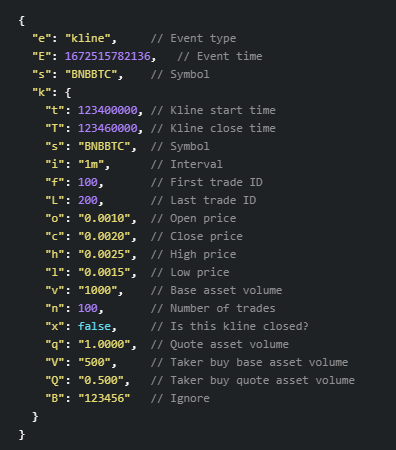

In [5]:
df = pd.DataFrame(columns = ["Open", "High" ,"Low", "Close", "Volume", "Complete"])
#시가,최고가,최저가,종가,거래량,봉의 닫힘 여부
df

,Open,High,Low,Close,Volume,Complete


In [6]:
def stream_candles(msg):
    '''define how to process incoming WebSocket message'''

    #extract the requird items from msg
    event_time = pd.to_datetime(msg["E"], unit = "ms")
    start_time = pd.to_datetime(msg["k"]["t"], unit = "ms")
    first   = float(msg["k"]["o"])
    high    = float(msg["k"]["h"])
    low     = float(msg["k"]["l"])
    close   = float(msg["k"]["c"])
    volume  = float(msg["k"]["v"])
    complete= msg["k"]["x"]

    #print out 
    print("Time: {} | Price : {}".format(event_time,close))
    
    #feed df (add new bar / update latest bar)
    df.loc[start_time] = [first, high, low, close, volume, complete]

In [7]:
twm = ThreadedWebsocketManager()
twm.start()

#### valid intervals = 1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1M

In [8]:
twm.start_kline_socket(callback = stream_candles, symbol = "BTCUSDT", interval = "1m")

'btcusdt@kline_1m'

Time: 2024-02-18 04:33:50.375000 | Price : 51573.99
Time: 2024-02-18 04:33:53.036000 | Price : 51573.99
Time: 2024-02-18 04:33:55.321000 | Price : 51574.0
Time: 2024-02-18 04:33:57.548000 | Price : 51573.99
Time: 2024-02-18 04:33:59.550000 | Price : 51574.0
Time: 2024-02-18 04:34:00.005000 | Price : 51573.99
Time: 2024-02-18 04:34:02.323000 | Price : 51573.99
Time: 2024-02-18 04:34:04.714000 | Price : 51558.93
Time: 2024-02-18 04:34:06.775000 | Price : 51558.92


In [9]:
twm.stop()

In [10]:
df

,Open,High,Low,Close,Volume,Complete
2024-02-18 04:33:00,51596.27,51596.27,51573.99,51573.99,14.96897,True
2024-02-18 04:34:00,51574.00,51574.00,51558.92,51558.92,38.45481,False


Time: 2024-02-18 04:34:09.135000 | Price : 51558.92


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2 entries, 2024-02-18 04:33:00 to 2024-02-18 04:34:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      2 non-null      float64
 1   High      2 non-null      float64
 2   Low       2 non-null      float64
 3   Close     2 non-null      float64
 4   Volume    2 non-null      float64
 5   Complete  2 non-null      bool   
dtypes: bool(1), float64(5)
memory usage: 206.0 bytes
